In [1761]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import metrics
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [1762]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1763]:
project_path = "/content/drive/My Drive/Colab Notebooks/"

In [1764]:
wine=pd.read_csv(project_path+"winequality-red.csv")

# EDA

In [1765]:
wine.shape

(1599, 12)

In [1766]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1767]:
wine.isnull().values.any()

False

In [1768]:
wine.head(10)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5
5            7.4              0.66         0.00  ...       0.56      9.4        5
6            7.9              0.60         0.06  ...       0.46      9.4        5
7            7.3              0.65         0.00  ...       0.47     10.0        7
8            7.8              0.58         0.02  ...       0.57      9.5        7
9            7.5              0.50         0.36  ...       0.80     10.5        5

[10 rows x 12 columns]

In [1769]:
wine.tail(10)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1589            6.6             0.725         0.20  ...       0.54      9.2        5
1590            6.3             0.550         0.15  ...       0.82     11.6        6
1591            5.4             0.740         0.09  ...       0.56     11.6        6
1592            6.3             0.510         0.13  ...       0.75     11.0        6
1593            6.8             0.620         0.08  ...       0.82      9.5        6
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[10 rows x 12 columns]

In [1770]:
wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

#Univariate analysis

In [1771]:
fig=px.histogram(wine,x="fixed acidity",template="presentation",title="fixed acidity in the wine")
fig.show()

In [1772]:
fig=px.histogram(wine,x="volatile acidity",template="presentation",title="volatile acidity in the wine")
fig.show()

In [1773]:
fig=px.histogram(wine,x="citric acid",template="presentation",title="citric acid in the wine")
fig.show()

In [1774]:
fig=px.histogram(wine,x="residual sugar",template="presentation",title="residual sugar in the wine")
fig.show()

In [1775]:
fig=px.histogram(wine,x="chlorides",template="presentation",title="chlorides in the wine")
fig.show()

In [1776]:
fig=px.histogram(wine,x="free sulfur dioxide",template="presentation",title="free sulfur dioxide in the wine")
fig.show()

In [1777]:
fig=px.histogram(wine,x="total sulfur dioxide",template="presentation",title="total sulfur dioxide in the wine")
fig.show()

In [1778]:
fig=px.histogram(wine,x="density",template="presentation",title="density of the wine")
fig.show()

In [1779]:
fig=px.histogram(wine,x="pH",template="presentation",title="pH of the wine")
fig.show()

In [1780]:
fig=px.histogram(wine,x="sulphates",template="presentation",title="sulphates in the wine")
fig.show()

In [1781]:
fig=px.histogram(wine,x="alcohol",template="presentation",title="alcohol in the wine")
fig.show()

In [1782]:
fig=px.histogram(wine,x="quality",template="presentation",title="quality of the wine")
fig.show()

# Bivariate analysis

In [1783]:
fig = px.density_heatmap(wine, x="fixed acidity", y="quality",template="ggplot2",title="fixed acidity vs quality",color_continuous_scale="edge")
fig.show()

In [1784]:
fig = px.density_heatmap(wine, x="volatile acidity", y="quality",template="ggplot2",title="volatile acidity vs quality",color_continuous_scale="edge")
fig.show()

In [1785]:
fig = px.density_heatmap(wine, x="citric acid", y="quality",template="ggplot2",title="citric acid vs quality",color_continuous_scale="edge")
fig.show()

In [1786]:
fig = px.density_heatmap(wine, x="residual sugar", y="quality",template="ggplot2",title="residual sugar vs quality",color_continuous_scale="edge")
fig.show()

In [1787]:
fig = px.density_heatmap(wine, x="chlorides", y="quality",template="ggplot2",title="chlorides vs quality",color_continuous_scale="edge")
fig.show()

In [1788]:
fig = px.density_heatmap(wine, x="free sulfur dioxide", y="quality",template="ggplot2",title="free sulfur dioxide vs quality",color_continuous_scale="edge")
fig.show()

In [1789]:
fig = px.density_heatmap(wine, x="total sulfur dioxide", y="quality",template="ggplot2",title="total sulfur dioxide vs quality",color_continuous_scale="edge")
fig.show()

In [1790]:
fig = px.density_heatmap(wine, x="density", y="quality",template="ggplot2",title="density vs quality",color_continuous_scale="edge")
fig.show()

In [1791]:
fig = px.density_heatmap(wine, x="pH", y="quality",template="ggplot2",title="pH vs quality",color_continuous_scale="edge")
fig.show()

In [1792]:
fig = px.density_heatmap(wine, x="sulphates", y="quality",template="ggplot2",title="sulphates vs quality",color_continuous_scale="edge")
fig.show()

In [1793]:
fig = px.density_heatmap(wine, x="alcohol", y="quality",template="ggplot2",title="alcohol vs quality",color_continuous_scale="edge")
fig.show()

In [1794]:
fig = px.density_heatmap(wine, x="residual sugar", y="alcohol",template="ggplot2",title="residual sugar vs alcohol",color_continuous_scale="edge")
fig.show()

In [1795]:
fig = px.density_heatmap(wine, x="free sulfur dioxide", y="total sulfur dioxide",template="plotly_dark",title="free sulfur vs total sulfur",color_continuous_scale="edge")
fig.show()

In [1796]:
corre=wine.corr()
wine.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.390558  ...  0.476166  1.000000

[12 rows x 12 columns]

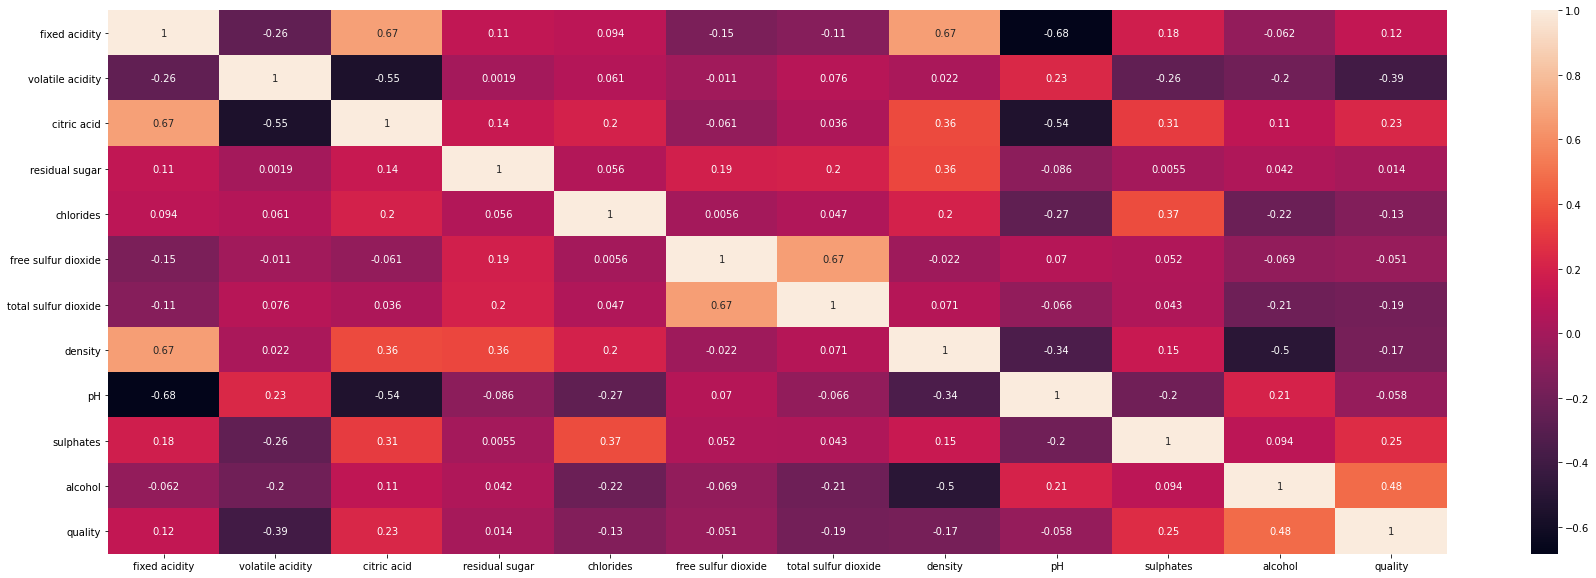

In [1797]:
plt.figure(figsize=(30,10))
sns.heatmap(corre,annot=True)

In [1798]:
bins = (2, 5.6, 8)
labels = ['bad', 'good']
wine['quality'] = pd.cut(x = wine['quality'], bins = bins, labels = labels)

In [1799]:
wine['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [1800]:

labelencoder_y = LabelEncoder()
wine['quality'] = labelencoder_y.fit_transform(wine['quality'])

In [1801]:
x=wine.drop('quality',axis=1)

In [1802]:
x.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]

In [1803]:
y = wine['quality']

In [1804]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1805]:
print("shape of x_train = ",x_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of x_test = ",x_test.shape)
print("shape of y_test = ",y_test.shape)

shape of x_train =  (1119, 11)
shape of y_train =  (1119,)
shape of x_test =  (480, 11)
shape of y_test =  (480,)


In [1806]:

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [1807]:
table=pd.DataFrame(columns = ["classifier", "accuracy"])

## Logistic regression

In [1808]:

model = LogisticRegression(solver="liblinear")
model.fit(x_train_scaled, y_train)
log_wine_predict = model.predict(x_test_scaled)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


         0         1         2  ...         9        10  intercept
0  0.23039 -0.618128 -0.262776  ...  0.425069  0.975694   0.185461

[1 rows x 12 columns]


In [1809]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, log_wine_predict)))
print()
log_acc=metrics.accuracy_score(y_test, log_wine_predict)
table= table.append({'classifier': 'Logistic Regression','accuracy': log_acc}, ignore_index=True)

Model Accuracy:  0.7354166666666667



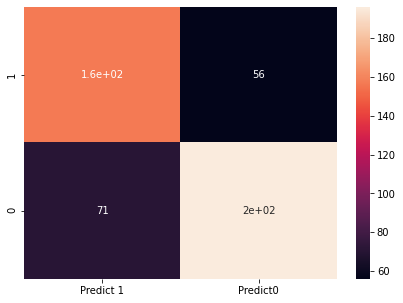

In [1810]:
lrm=metrics.confusion_matrix(y_test, log_wine_predict)
lr_m = pd.DataFrame(lrm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict0"]])
plt.figure(figsize = (7,5))
sns.heatmap(lr_m,annot=True)


In [1811]:
print("Classification Report")
print(metrics.classification_report(y_test,log_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.73      0.76       267
           0       0.69      0.74      0.71       213

    accuracy                           0.74       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.74      0.74       480



In [1812]:
wine.groupby(["quality"]).count()

fixed acidity  volatile acidity  citric acid  ...   pH  sulphates  alcohol
quality                                                ...                         
0                  744               744          744  ...  744        744      744
1                  855               855          855  ...  855        855      855

[2 rows x 11 columns]

In [1813]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
def roc_plot(y_score,y_test):
  fpr, tpr, thresholds = roc_curve(y_test, y_score)

  fig = px.area(
      x=fpr, y=tpr,
      title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='False Positive Rate', y='True Positive Rate'),
      width=700, height=500
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  fig.show()

  precision, recall, thresholds = precision_recall_curve(y_test, y_score)

  fig = px.area(
      x=recall, y=precision,
      title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='Recall', y='Precision'),
      width=700, height=500
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=1, y1=0
  )
  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  fig.show()
  return

In [1814]:
y_score = model.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## KNN Classifier

In [1815]:
from scipy.stats import zscore

XScaled = x.apply(zscore)
XScaled.describe()


fixed acidity  volatile acidity  ...     sulphates       alcohol
count   1.599000e+03      1.599000e+03  ...  1.599000e+03  1.599000e+03
mean    3.435512e-16      1.699704e-16  ...  7.639596e-16  9.437243e-16
std     1.000313e+00      1.000313e+00  ...  1.000313e+00  1.000313e+00
min    -2.137045e+00     -2.278280e+00  ... -1.936507e+00 -1.898919e+00
25%    -7.007187e-01     -7.699311e-01  ... -6.382196e-01 -8.663789e-01
50%    -2.410944e-01     -4.368911e-02  ... -2.251281e-01 -2.093081e-01
75%     5.057952e-01      6.266881e-01  ...  4.240158e-01  6.354971e-01
max     4.355149e+00      5.877976e+00  ...  7.918677e+00  4.202453e+00

[8 rows x 11 columns]

In [1816]:
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=42)


In [1817]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [1818]:
NNH.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [1819]:
KNN_wine_predict = NNH.predict(x_test)
print("Model Accuracy: ",(metrics.accuracy_score(y_test,KNN_wine_predict )))
print()
KNN_acc=metrics.accuracy_score(y_test, KNN_wine_predict)
table= table.append({'classifier': 'KNN','accuracy': KNN_acc}, ignore_index=True)

Model Accuracy:  0.7645833333333333



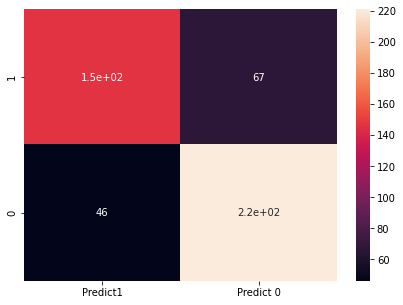

In [1820]:
knnm=metrics.confusion_matrix(y_test, KNN_wine_predict)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [1821]:
print("Classification Report")
print(metrics.classification_report(y_test,KNN_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.83      0.80       267
           0       0.76      0.69      0.72       213

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



In [1822]:
y_score = NNH.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

##Naive Bayes

In [1823]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1824]:
NB = GaussianNB()
NB.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [1825]:
NB_wine_predict = NB.predict(x_test)
print("Model Accuracy:",(metrics.accuracy_score(y_test,NB_wine_predict)))
print()
NB_acc=metrics.accuracy_score(y_test, NB_wine_predict)
table= table.append({'classifier': 'Naive Bayes','accuracy': NB_acc}, ignore_index=True)

Model Accuracy: 0.7479166666666667



Confusion Matrix


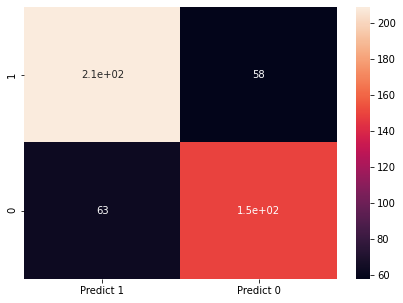

In [1826]:
print("Confusion Matrix")
nbtm=metrics.confusion_matrix(y_test,NB_wine_predict, labels=[1,0])
nbt_m = pd.DataFrame(nbtm, index = [i for i in ["1","0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(nbt_m, annot=True)

In [1827]:
print("Classification Report")
print(metrics.classification_report(y_test,NB_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.78      0.78       267
           0       0.72      0.70      0.71       213

    accuracy                           0.75       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.75      0.75      0.75       480



In [1828]:
y_score = NB.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## SVM classifier

In [1829]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1830]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

SVC_wine_predict= svc_model .predict(x_test)

In [1831]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, SVC_wine_predict)))
print()
SVC_acc=metrics.accuracy_score(y_test, SVC_wine_predict)
table= table.append({'classifier': 'SVM (Linear)','accuracy': SVC_acc}, ignore_index=True)

Model Accuracy:  0.7083333333333334



In [1832]:
print("Confusion Matrix:\n",confusion_matrix(y_test,SVC_wine_predict))

Confusion Matrix:
 [[162  51]
 [ 89 178]]


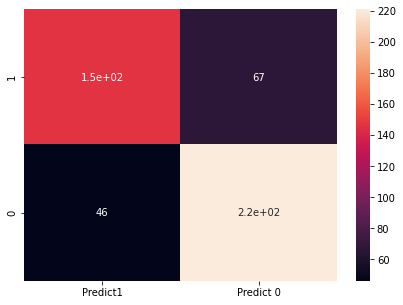

In [1833]:
svcm=metrics.confusion_matrix(y_test,SVC_wine_predict)
svc_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [1834]:
print("Classification Report")
print(metrics.classification_report(y_test,SVC_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.67      0.72       267
           0       0.65      0.76      0.70       213

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.72      0.71      0.71       480



### SVM(rbf kernel)

In [1836]:
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)
SVC1_wine_predict = svc_model.predict(x_test)


In [1837]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, SVC1_wine_predict)))
print()
SVC1_acc=metrics.accuracy_score(y_test, SVC1_wine_predict)
table= table.append({'classifier': 'SVM(rbf)','accuracy': SVC1_acc}, ignore_index=True)

Model Accuracy:  0.6458333333333334



In [1838]:
print("Confusion Matrix:\n",confusion_matrix(y_test,SVC1_wine_predict))

Confusion Matrix:
 [[ 75 138]
 [ 32 235]]


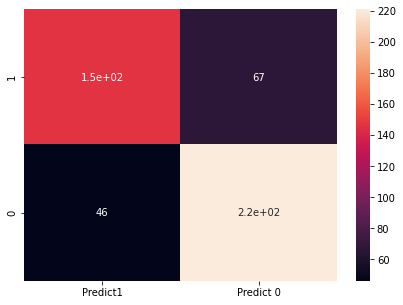

In [1839]:
svc1m=metrics.confusion_matrix(y_test,SVC1_wine_predict)
svc1_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [1840]:
print("Classification Report")
print(metrics.classification_report(y_test,SVC1_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.88      0.73       267
           0       0.70      0.35      0.47       213

    accuracy                           0.65       480
   macro avg       0.67      0.62      0.60       480
weighted avg       0.66      0.65      0.62       480



### SVM(Polynomial kernel)

In [1842]:
svc_model  = SVC(kernel='poly')
svc_model.fit(x_train, y_train)

SVC2_wine_predict= svc_model.predict(x_test)

In [1843]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, SVC2_wine_predict)))
print()
SVC2_acc=metrics.accuracy_score(y_test, SVC2_wine_predict)
table= table.append({'classifier': 'SVM(Polynomial Kernel)','accuracy': SVC2_acc}, ignore_index=True)

Model Accuracy:  0.6375



In [1844]:
print("Confusion Matrix:\n",confusion_matrix(y_test,SVC2_wine_predict))

Confusion Matrix:
 [[ 56 157]
 [ 17 250]]


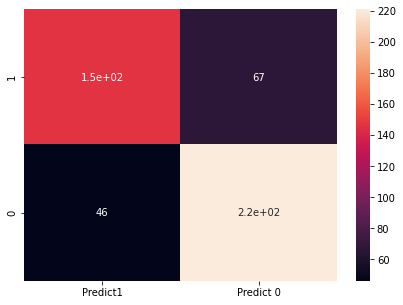

In [1845]:
SVC2m=metrics.confusion_matrix(y_test,SVC2_wine_predict)
SVC2_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

### SVM(sigmoid kernel)

In [1847]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(x_train, y_train)
SVC3_wine_predict = svc_model.predict(x_test)

In [1848]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test,SVC3_wine_predict)))
print()
SVC3_acc=metrics.accuracy_score(y_test, SVC3_wine_predict)
table= table.append({'classifier': 'SVM(Sigmoid)','accuracy': SVC3_acc}, ignore_index=True)

Model Accuracy:  0.42291666666666666



In [1849]:
print("Confusion Matrix:\n",confusion_matrix(y_test,SVC3_wine_predict))

Confusion Matrix:
 [[ 79 134]
 [143 124]]


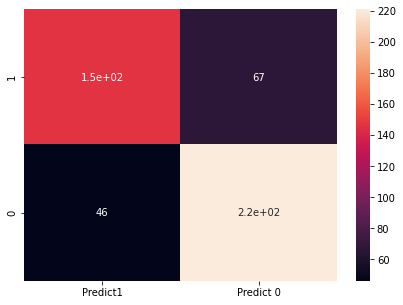

In [1850]:
svc3m=metrics.confusion_matrix(y_test,SVC3_wine_predict)
svc3_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

##Decision Tree

In [1852]:
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
clf = DecisionTreeClassifier()

clf=clf.fit(x_train,y_train)

clf_wine_predict = clf.predict(x_test)

In [1853]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, clf_wine_predict)))
print()
clf_acc=metrics.accuracy_score(y_test, clf_wine_predict)
table= table.append({'classifier': 'Decision Tree','accuracy': clf_acc}, ignore_index=True)

Model Accuracy:  0.7770833333333333



In [1854]:
print("Confusion Matrix:\n",confusion_matrix(y_test,clf_wine_predict))

Confusion Matrix:
 [[155  58]
 [ 49 218]]


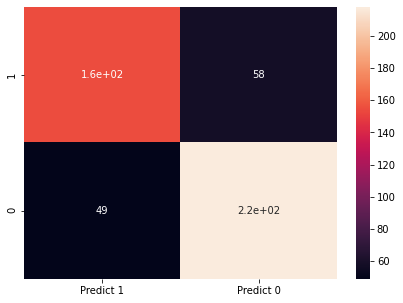

In [1855]:
tree=metrics.confusion_matrix(y_test,clf_wine_predict)
tree_m = pd.DataFrame(tree, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(tree_m, annot=True)

In [1856]:
print("Classification Report")
print(metrics.classification_report(y_test,clf_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.82      0.80       267
           0       0.76      0.73      0.74       213

    accuracy                           0.78       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.78      0.78      0.78       480



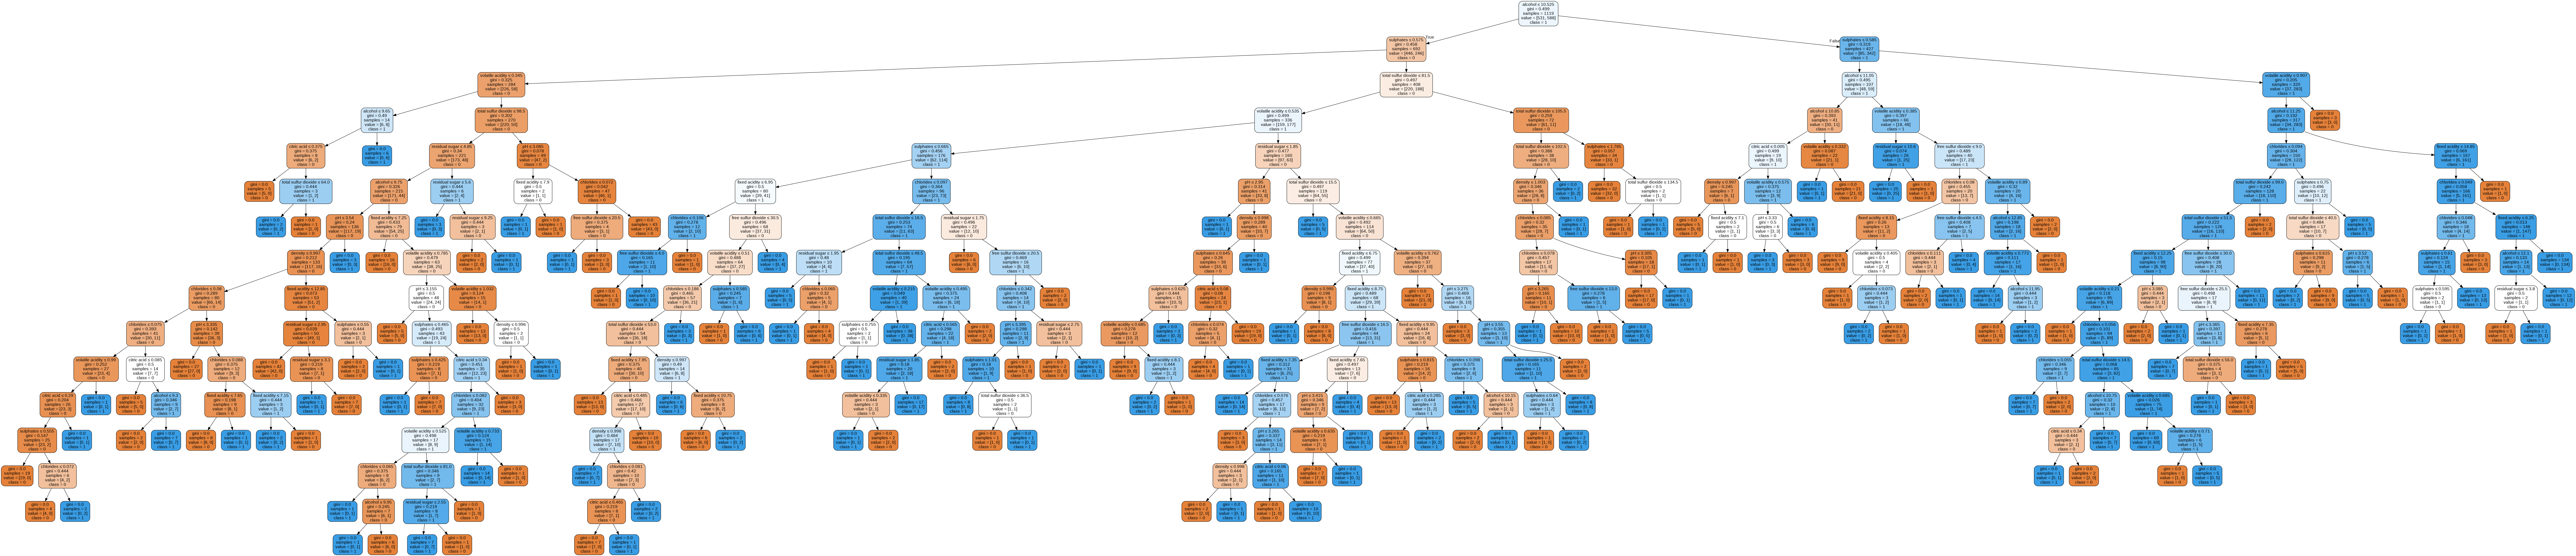

In [1857]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine.png')
Image(graph.create_png())


In [1858]:
y_score = clf.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## Pruned Decision Tree

In [1859]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
clf1_wine_predict = clf.predict(x_test)
print("Model Accuracy: ",(metrics.accuracy_score(y_test, clf1_wine_predict)))
print()
clf1_acc=metrics.accuracy_score(y_test, clf1_wine_predict)
table= table.append({'classifier': 'Pruned decision tree','accuracy': clf1_acc}, ignore_index=True)

Model Accuracy:  0.675



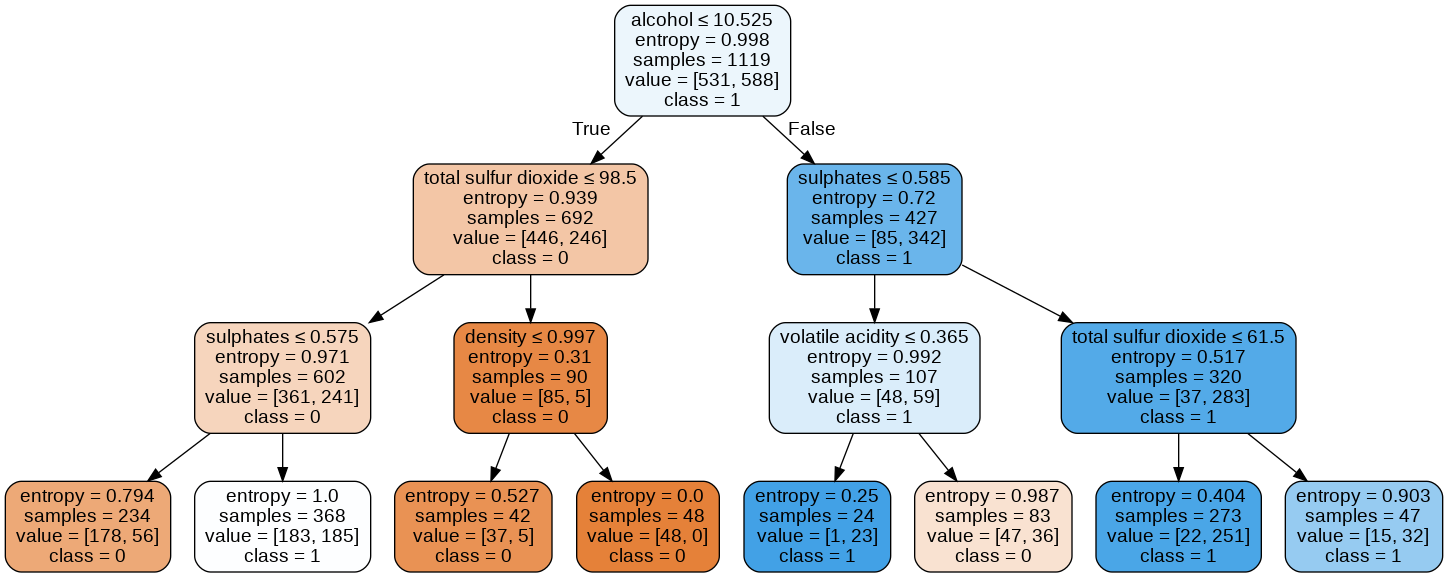

In [1860]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine1.png')
Image(graph.create_png())


In [1861]:
y_score = clf.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## Random forest classifier

In [1862]:
rf = RandomForestClassifier(n_estimators = 70,criterion="entropy")
rf = rf.fit(x_train, y_train)

In [1863]:
rf_wine_predict= rf.predict(x_test)

In [1864]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, rf_wine_predict)))
print()
rf_acc=metrics.accuracy_score(y_test, rf_wine_predict)
table= table.append({'classifier': 'Random forest','accuracy': rf_acc}, ignore_index=True)

Model Accuracy:  0.8125



In [1865]:
print("Confusion Matrix:\n",confusion_matrix(y_test,rf_wine_predict))

Confusion Matrix:
 [[168  45]
 [ 45 222]]


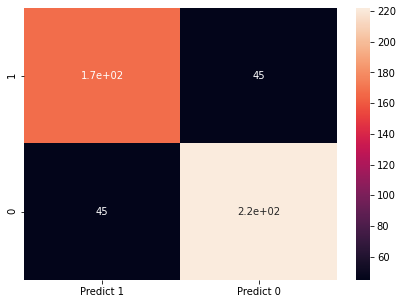

In [1866]:
rf1=metrics.confusion_matrix(y_test,rf_wine_predict)
rf1_m = pd.DataFrame(rf1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(rf1_m, annot=True)

In [1867]:

print("Classification Report")
print(metrics.classification_report(y_test,rf_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.83      0.83       267
           0       0.79      0.79      0.79       213

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



In [1868]:
y_score = rf.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## AdaBoost Classifier

In [1869]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
model = abc.fit(x_train, y_train)
ab_wine_predict = model.predict(x_test)


In [1870]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, ab_wine_predict)))
print()
ab_acc=metrics.accuracy_score(y_test, ab_wine_predict)
table= table.append({'classifier': 'AdaBoost','accuracy': ab_acc}, ignore_index=True)

Model Accuracy:  0.75



In [1871]:
print("Confusion Matrix:\n",confusion_matrix(y_test,ab_wine_predict))

Confusion Matrix:
 [[158  55]
 [ 65 202]]


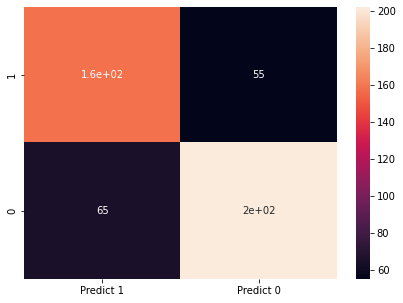

In [1872]:
ab=metrics.confusion_matrix(y_test,ab_wine_predict)
ab_m = pd.DataFrame(ab, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(ab_m, annot=True)

In [1873]:
print("Classification Report")
print(metrics.classification_report(y_test,ab_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.76      0.77       267
           0       0.71      0.74      0.72       213

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [1874]:
y_score = abc.predict_proba(x_test)  
y_score = y_score[:, 1]   
roc_plot(y_score,y_test)

## Bagging

In [1875]:
bag = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag= bag.fit(x_train, y_train)

In [1876]:
bag_wine_predict =bag.predict(x_test)

In [1877]:
print("Model Accuracy: ",(metrics.accuracy_score(y_test, bag_wine_predict)))
print()
bag_acc=metrics.accuracy_score(y_test, bag_wine_predict)
table= table.append({'classifier': 'Bagging','accuracy': bag_acc}, ignore_index=True)

Model Accuracy:  0.7916666666666666



In [1878]:
print("Confusion Matrix:\n",confusion_matrix(y_test,bag_wine_predict))

Confusion Matrix:
 [[168  45]
 [ 55 212]]


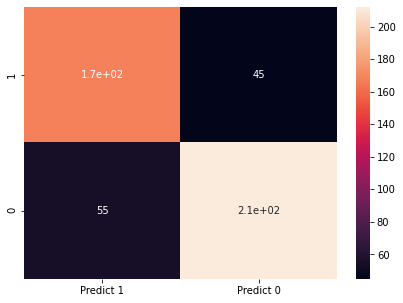

In [1879]:
bag=metrics.confusion_matrix(y_test,bag_wine_predict)
bag_m = pd.DataFrame(bag, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(bag_m, annot=True)

In [1880]:
print("Classification Report")
print(metrics.classification_report(y_test,bag_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.79      0.81       267
           0       0.75      0.79      0.77       213

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



## Gradient Boosting

In [1882]:
grad = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=42)
grad = grad.fit(x_train, y_train)

In [1883]:
grad_wine_predict =grad.predict(x_test)
print("Model Accuracy: ",(metrics.accuracy_score(y_test, grad_wine_predict)))
print()
grad_acc=metrics.accuracy_score(y_test, grad_wine_predict)
table= table.append({'classifier': 'Gradient Boosting','accuracy': grad_acc}, ignore_index=True)

Model Accuracy:  0.7770833333333333



In [1884]:
print("Confusion Matrix:\n",confusion_matrix(y_test,grad_wine_predict))

Confusion Matrix:
 [[166  47]
 [ 60 207]]


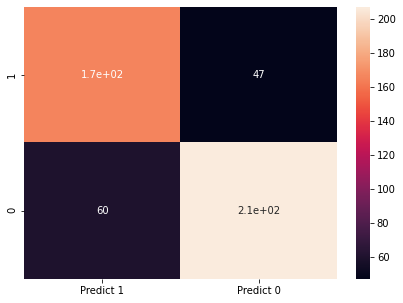

In [1885]:
grad=metrics.confusion_matrix(y_test,grad_wine_predict)
grad_m = pd.DataFrame(grad, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(grad_m, annot=True)

In [1886]:
print("Classification Report")
print(metrics.classification_report(y_test,grad_wine_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.81      0.78      0.79       267
           0       0.73      0.78      0.76       213

    accuracy                           0.78       480
   macro avg       0.77      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



## Stacking

In [1888]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 =SVC(C= .1, kernel='linear', gamma= 1)
lr=LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.59 (+/- 0.03) [KNN]
Accuracy: 0.72 (+/- 0.03) [Random Forest]
Accuracy: 0.72 (+/- 0.02) [Naive Bayes]
Accuracy: 0.72 (+/- 0.01) [StackingClassifier]


In [1889]:
print(table)

                classifier  accuracy
0      Logistic Regression  0.735417
1                      KNN  0.764583
2              Naive Bayes  0.747917
3             SVM (Linear)  0.708333
4                 SVM(rbf)  0.645833
5   SVM(Polynomial Kernel)  0.637500
6             SVM(Sigmoid)  0.422917
7            Decision Tree  0.777083
8     Pruned decision tree  0.675000
9            Random forest  0.812500
10                AdaBoost  0.750000
11                 Bagging  0.791667
12       Gradient Boosting  0.777083
